In [58]:
import pandas as pd
import numpy as np
from scipy import stats

import missingno as msno

import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data
accepted = pd.read_csv('data/LC/Lending_Club_Accepted_2014_2018.csv')
rejected = pd.read_csv('data/LC/Lending_Club_Rejected_2014_2018.csv')
print(accepted.shape)
display(accepted.head())
print(rejected.shape)
display(rejected.head())

/Users/jeremylee/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (19,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(2029952, 151)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


(26132308, 9)


,Amount_Requested,Application_Date,Loan_Title,Risk_Score,Debt_to_Income_Ratio,Zip_Code,State,Employment_Length,Policy_Code
0,1000.0,2016-04-01,other,NaN,2.69%,331xx,FL,< 1 year,0.0
1,4000.0,2016-04-01,debt_consolidation,NaN,28.26%,834xx,ID,< 1 year,0.0
2,5000.0,2016-04-01,moving,NaN,-1%,648xx,MO,NaN,0.0
3,1000.0,2016-04-01,moving,628.0,21.43%,380xx,TN,< 1 year,0.0
4,3000.0,2016-04-01,Debt consolidation,NaN,8.49%,895xx,NV,2 years,2.0


In [12]:
count = 0
for col in accepted.columns:
    prop_missing = accepted[col].isna().mean()
    if prop_missing > 0.9:
        print(f'Column: {col}, Proportion missing: {prop_missing}')
        count += 1
print(f'{count} Columns with over 90% missing data')

Column: member_id, Proportion missing: 1.0
Column: desc, Proportion missing: 0.9924397227126552
Column: annual_inc_joint, Proportion missing: 0.9405355397566051
Column: dti_joint, Proportion missing: 0.9405375102465477
Column: verification_status_joint, Proportion missing: 0.9429887997351661
Column: revol_bal_joint, Proportion missing: 0.9467869190995649
Column: sec_app_fico_range_low, Proportion missing: 0.9467864264770792
Column: sec_app_fico_range_high, Proportion missing: 0.9467864264770792
Column: sec_app_earliest_cr_line, Proportion missing: 0.9467864264770792
Column: sec_app_inq_last_6mths, Proportion missing: 0.9467864264770792
Column: sec_app_mort_acc, Proportion missing: 0.9467864264770792
Column: sec_app_open_acc, Proportion missing: 0.9467864264770792
Column: sec_app_revol_util, Proportion missing: 0.9476913739832272
Column: sec_app_open_act_il, Proportion missing: 0.9467864264770792
Column: sec_app_num_rev_accts, Proportion missing: 0.9467864264770792
Column: sec_app_charg

In [10]:
for col in rejected.columns:
    print(f'Column: {col}, Proportion missing: {rejected[col].isna().mean()}')

Column: Amount_Requested, Proportion missing: 0.0
Column: Application_Date, Proportion missing: 0.0
Column: Loan_Title, Proportion missing: 4.932591487900724e-05
Column: Risk_Score, Proportion missing: 0.7060179682559994
Column: Debt_to_Income_Ratio, Proportion missing: 0.0
Column: Zip_Code, Proportion missing: 1.0370304834919289e-05
Column: State, Proportion missing: 3.826680750892726e-08
Column: Employment_Length, Proportion missing: 0.03566757287569089
Column: Policy_Code, Proportion missing: 3.512892929319523e-05


In [15]:
(accepted['loan_amnt'] == accepted['funded_amnt']).mean()

0.999998522132543

In [23]:
rejected['Application_Date']

0           2016-04-01
1           2016-04-01
2           2016-04-01
3           2016-04-01
4           2016-04-01
               ...    
26132303    2016-12-31
26132304    2016-12-31
26132305    2016-12-31
26132306    2016-12-31
26132307    2016-12-31
Name: Application_Date, Length: 26132308, dtype: object

In [41]:
stripped_accepted = accepted[['loan_amnt', 'issue_d', 'title', 'dti', 'zip_code', 'addr_state', 'emp_length', 'policy_code']]
stripped_accepted['accepted'] = 1
rejected.rename(columns={'Amount_Requested': 'loan_amnt',
                         'Application_Date': 'date',
                         'Loan_Title': 'title',
                         'Risk_Score': 'risk_score',
                         'Debt_to_Income_Ratio': 'dti',
                         'Zip_Code': 'zip_code',
                         'State': 'state',
                         'Employment_Length': 'emp_length',
                         'Policy_Code': 'policy_code'}, inplace=True)
rejected.drop(columns='risk_score', inplace=True)
rejected['accepted'] = 0
stripped_accepted.rename(columns={'issue_d': 'date',
                                  'addr_state': 'state'}, inplace=True)
full_data = pd.concat([stripped_accepted, rejected])
full_data.head()

,loan_amnt,date,title,dti,zip_code,state,emp_length,policy_code,accepted
0,3600.0,Dec-2015,Debt consolidation,5.91,190xx,PA,10+ years,1.0,1
1,24700.0,Dec-2015,Business,16.06,577xx,SD,10+ years,1.0,1
2,20000.0,Dec-2015,NaN,10.78,605xx,IL,10+ years,1.0,1
3,35000.0,Dec-2015,Debt consolidation,17.06,076xx,NJ,10+ years,1.0,1
4,10400.0,Dec-2015,Major purchase,25.37,174xx,PA,3 years,1.0,1


In [57]:
full_data['loan_amnt'].describe()

count    2.816226e+07
mean     1.328498e+04
std      1.488180e+04
min      0.000000e+00
25%      5.000000e+03
50%      1.000000e+04
75%      2.000000e+04
max      1.400000e+06
Name: loan_amnt, dtype: float64

In [ ]:
rename_titles = {'Debt consolidation': 'debt_consolidation',
                'Other': 'other', }

In [73]:
full_data['title'].value_counts().index[:50]

Index(['Debt consolidation', 'debt_consolidation', 'Other',
       'Credit card refinancing', 'other', 'credit_card', 'Car financing',
       'home_improvement', 'Home improvement', 'Major purchase', 'Home buying',
       'car', 'Medical expenses', 'major_purchase', 'moving', 'Business Loan',
       'Moving and relocation', 'medical', 'small_business', 'Business',
       'house', 'vacation', 'Vacation', 'renewable_energy', 'Green loan',
       'Business Line Of Credit', 'Debt Consolidation', 'wedding',
       'Consolidation', 'debt consolidation', 'Credit Card Consolidation',
       'Learning and training', 'consolidation', 'Debt Consolidation Loan',
       'Consolidation Loan', 'Home Improvement', 'Personal Loan',
       'Credit Card Refinance', 'Credit Card Payoff', 'Consolidate',
       'Personal', 'credit cards', 'Payoff', 'Freedom',
       'credit card refinance', 'DEBT CONSOLIDATION', 'Debt', 'Credit Card',
       'My Loan', 'consolidate'],
      dtype='object')

In [67]:
full_data['log_loan_amnt'] = np.log(full_data['loan_amnt'] + 1)

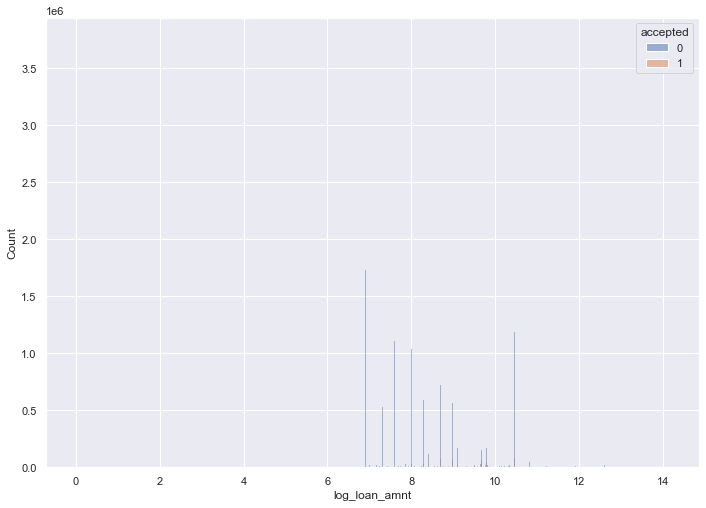

In [69]:
sns.histplot(data=full_data, x='log_loan_amnt', hue='accepted')